In [1]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../../'); from config import *
configure_pylab()
rc('text.latex',preamble=r"\usepackage{amsmath}")
matplotlib.rc('text', usetex = True)
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams.update(params)

Available files:
	r2288_180515b_tet2_cell2_GC.mat
	r2289_250515b_tet2_cell2_GC.mat
	r2298_290615c_tet6_cell6_GC.mat
	r2375_070416a_tet1_cell1_GC.mat
	r2375_140416b_tet1_cell1_GC.mat
	r2375_210416a_tet3_cell3_GC.mat
	r2383_160516b_tet4_cell4_GC.mat
	r2405_011216a_cell2955.mat
	r2405_051216b_cell1816.mat
	r2405_121216b_cell1880.mat
	r2405_121216b_cell1912.mat
	r2405_191216c_cell1640.mat
	r2405_191216c_cell1662.mat
	r2405_191216c_cell1962.mat
	r2405_191216c_cell1990.mat
Fitted models in fitdir = /home/mer49/Desktop/lgcpspatial/python/notebooks/hyperparameter_fits/


# Figure 2 

In [2]:
def normalizep(p,x):
    dx = diff(x)
    dx = interp(linspace(0,1,len(x)),linspace(0,1,len(dx)),dx)
    z  = sum(p*dx)
    return p/z

npdf = lambda μ,σ,x:1/sqrt(2*pi)*exp(-0.5*(x-μ)**2/σ**2)/σ

def lnpdf(μ,σ,x):
    Δ = log(x)-μ
    return sexp(-0.5*Δ**2/σ**2)/(x*σ*sqrt(2*pi))

def ppdf(y,x):
    return normalizep(x**y*exp(-x),x)

def lppdf(y,x):
    return normalizep(exp(x)**y*exp(-exp(x)),x)#*exp(x)

def quickannotate(x,y,i,s,dx=.02,dy=0.025,**kwargs):
    px,py = x[i],y[i]
    xt,yt = px+dx,py+dy
    text(xt,yt,s,fontsize=SMALL,**kwargs)

μ0 = -4
v0 = 10
k  = .3

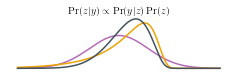

In [3]:
def bayescartoon():
    x = linspace(-15,7,200)
    prior = normalizep(npdf(μ0,sqrt(v0),x),x)
    like  = normalizep(lppdf(k,x),x)
    post  = normalizep(prior*like,x)
    plot(x,prior,color=MAUVE)
    plot(x,like,color=OCHRE)
    plot(x,post,color=BLACK)
    noaxis()
    yticks([])
    xticks([])
    text(mean(x),ylim()[1],r'$\Pr(z|y)\propto\Pr(y|z)\Pr(z)$',
         ha='center',
         va='bottom')
    
figure(figsize=(4,1))
bayescartoon()

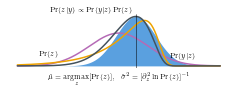

In [4]:
def log_curvature(x,p,i):
    lp = log(p)
    d1 = (lp[i+2]-lp[i])/(x[i+2]-x[i])
    d2 = (lp[i]-lp[i-2])/(x[i]-x[i-2])
    cv = (d2-d1)/(x[i+1]-x[i-1])
    return cv    

def mapcartoon():
    x = linspace(-15,7,400)
    prior = normalizep(npdf(μ0,sqrt(v0),x),x)
    like  = normalizep(lppdf(k,x),x)
    post  = normalizep(prior*like,x)
    plot(x,prior,color=MAUVE)
    plot(x,like,color=OCHRE)
    plot(x,post,color=BLACK)
    noaxis()
    yticks([])
    xticks([])
    i = argmax(post)
    axvline(x[i],lw=.5,color='k')
    cv = sqrt(1/log_curvature(x,post,i))
    la = npdf(x[i],cv,x)
    la = la*max(post)/max(la)
    fill_between(x,la,0,zorder=-10,color=AZURE,lw=0)
    xlabel(r'$\begin{aligned}\hat\mu&=\underset{z}{\operatorname{argmax}}[\Pr(z)],\;\;'
         r'\hat\sigma^2=[\partial^2_z\ln\Pr(z)]^{-1}\end{aligned}$',fontsize=SMALL)
    quickannotate(x,like,300,r'$\Pr(y|z)$')
    quickannotate(x,post,225,r'$\Pr(z|y)\propto\Pr(y|z)\Pr(z)$',ha='right',dy=.02)
    quickannotate(x,prior,80,r'$\Pr(z)$',ha='right')
    
figure(figsize=(4,1))
mapcartoon()

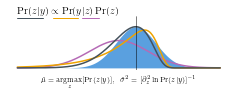

In [5]:
def log_curvature(x,p,i):
    lp = log(p)
    d1 = (lp[i+2]-lp[i])/(x[i+2]-x[i])
    d2 = (lp[i]-lp[i-2])/(x[i]-x[i-2])
    cv = (d2-d1)/(x[i+1]-x[i-1])
    return cv    

color_limits = [(0,50),(71,120),(127,160)]

def mapcartoon():
    x = linspace(-15,7,400)
    prior = normalizep(npdf(μ0,sqrt(v0),x),x)
    like  = normalizep(lppdf(k,x),x)
    post  = normalizep(prior*like,x)
    plot(x,prior,color=MAUVE)
    plot(x,like,color=OCHRE)
    plot(x,post,color=BLACK)
    noaxis()
    yticks([])
    xticks([])
    i = argmax(post)
    axvline(x[i],lw=.5,color='k')
    cv = sqrt(1/log_curvature(x,post,i))
    la = npdf(x[i],cv,x)
    la = la*max(post)/max(la)
    fill_between(x,la,0,zorder=-10,color=AZURE,lw=0)
    xlabel(r'$\begin{aligned}\hat\mu&=\underset{z}{\operatorname{argmax}}[\Pr(z|y)],\;\;'
         r'\hat\sigma^2=[\partial^2_z\ln\Pr(z|y)]^{-1}\end{aligned}$',fontsize=SMALL)

    yt = ylim()[1]+px2y(10)
    text(x[0],yt,r'$\Pr(z|y)\propto\Pr(y|z)\Pr(z)$',
         ha='left',
         va='bottom')
    y = yt-0.01
    plot([x[color_limits[0][0]],x[color_limits[0][1]]],[y,y],lw=1,color=BLACK)
    plot([x[color_limits[1][0]],x[color_limits[1][1]]],[y,y],lw=1,color=OCHRE)
    plot([x[color_limits[2][0]],x[color_limits[2][1]]],[y,y],lw=1,color=MAUVE)

figure(figsize=(4,1))
mapcartoon()

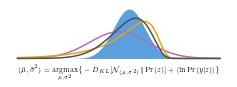

In [6]:
def variational(μ0,p0,y):
    μ = μ0
    p = 1
    for i in range(100):
        v = 1/p
        for i in range(10):
            dμ = .5*p0*(μ0-μ) + y - exp(μ+0.5*v)
            μ += 0.1*dμ
        for i in range(10):
            dv = -0.5*p0 + 0.5*p - 0.5*exp(μ+0.5*v)
            v += 0.1*dv
            p  = 1/v
    return μ,v

def varcartoon():
    x = linspace(-15,7,200)
    prior = normalizep(npdf(μ0,sqrt(v0),x),x)
    like  = normalizep(lppdf(k,x),x)
    post  = normalizep(prior*like,x)
    plot(x,prior,color=MAUVE)
    plot(x,like,color=OCHRE)
    plot(x,post,color=BLACK)
    noaxis()
    yticks([])
    xticks([])
    μ,v = variational(μ0,1/v0,k)
    vpost = npdf(μ,sqrt(v),x)
    fill_between(x,vpost,0,color=AZURE,lw=0)
    xlabel(r'$\begin{aligned}(\hat\mu,\hat\sigma^2)='
         r'\underset{\mu,\sigma^2}{\operatorname{argmax}}\big\{&'
         r'-D_{KL}[\mathcal N_{(\mu,\sigma^2)}\|\Pr(z)]'
         r'+\langle\ln\Pr(y|z)\rangle\big\}'
         r'\end{aligned}$',fontsize=SMALL)
    
figure(figsize=(4,1))
varcartoon()

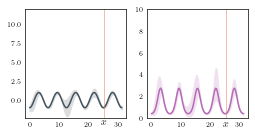

In [7]:
def cartoon():
    x = linspace(0,2*pi*5,100)
    z = -cos(x)
    blur = npdf(x[len(x)//2],1,x)
    blur = blur/np.max(blur)
    noise = real(ifft(fft(randn(len(x)))*fft(blur)))*.15
    
    subplot(121)
    plot(x,z)
    fill_between(x,z-noise,z+noise,color=1-(1-array(BLACK))*0.2)
    axvline(x[80],lw=0.5,color=RUST)
    text(x[80],ylim()[0]-0.01,'$x$',va='top',ha='center')
    ylim(ylim()[0],12)
    
    subplot(122)
    plot(x,exp(z),color=MAUVE)
    fill_between(x,exp(z-noise),exp(z+noise),color=1-(1-array(MAUVE))*0.2)
    axvline(x[80],lw=0.5,color=RUST)
    text(x[80],ylim()[0]-0.01,'$x$',va='top',ha='center')
    ylim(0,10)
    
figure(figsize=(4,2))
cartoon()
savefig('fig2a_carton_piece_1.svg', dpi=800)

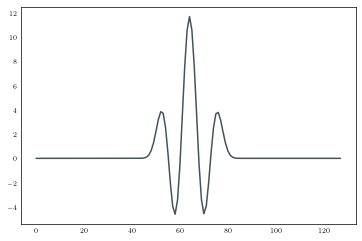

In [8]:

L = 128
P = 10
coords   = zgrid(L)
window   = hanning(L)
window   = fftshift(outer(window,window))
kern     = j0(fftshift(abs(coords*2*pi/P)))*window
Kf       = np.array(real(fft2(kern)))
clip     = fftshift(abs(coords)<P*jn_zeros(0,3)[-1]/(2*pi))
kern     = kern*clip
kern     = blur2d(kern,P/pi/sqrt(2))
plot(fftshift(kern)[L//2])
savefig('fig2a_carton_piece_2.svg', dpi=800)

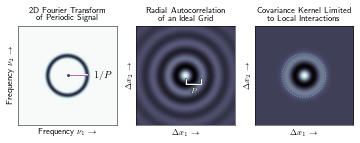

In [9]:
import matplotlib.patheffects


def kernelplot(A,B,C):
    
    L = 128
    P = 10
    k = 3
    coords   = zgrid(L)
    window   = hanning(L)
    window   = fftshift(outer(window,window))
    kern     = j0(fftshift(abs(coords*2*pi/P)))*window
    Kf       = np.array(real(fft2(kern)))

    def doaxis():
        plt.xticks([]); plt.yticks([])
        ax = gca()
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        xlim(L//4,L*3//4)
        ylim(L//4,L*3//4)
        
    sca(A)
    imshow(fftshift(Kf),cmap='bone_r',interpolation='bicubic')
    plot([L/2,L/2+L/P],[L/2,L/2],color='w',lw=2,zorder=1)
    scatter([L/2],[L/2],marker='o',s=20,facecolor='w',lw=0,zorder=1)
    plot([L/2,L/2+L/P],[L/2,L/2],color=MAUVE,lw=1,zorder=2)
    scatter([L/2],[L/2],marker='o',s=10,facecolor=BLACK,lw=0,zorder=2)
    text((L+L/P)/2+L/12,L/2,r'$1/P$',va='center')
    doaxis()
    title('2D Fourier Transform\nof Periodic Signal')
    xlabel(r'Frequency $\nu_1$ $\rightarrow$')
    ylabel(r'Frequency $\nu_2$ $\rightarrow$')
    
    sca(B)
    imshow(fftshift(real(ifft2(Kf))),cmap='bone',interpolation='bicubic',vmin=-.4,vmax=1)
    px = array([L/2,L/2,L/2+P,L/2+P])
    py = array([L/2,L/2-L/40,L/2-L/40,L/2])-L/50
    plot(px,py,lw=2,color=BLACK,zorder=1)
    plot(px,py,lw=1,color='w',zorder=2)
    # there must be a better way? 
    tx,ty = (L+P)/2,L/2-L/16
    t = text(tx,ty,r'$\boldsymbol P$',ha='center',va='top',color=BLACK,fontsize=SMALL,zorder=1)
    t.set_path_effects([matplotlib.patheffects.withStroke(linewidth=1.5, foreground=BLACK)])
    text(tx,ty,r'$P$',ha='center',va='top',color='w',fontsize=SMALL,zorder=20)
    doaxis()
    title('Radial Autocorrelation\nof an Ideal Grid')
    xlabel(r'$\Delta x_1$ $\rightarrow$')
    ylabel(r'$\Delta x_2$ $\rightarrow$')
        
    clip  = fftshift(abs(coords)<P*jn_zeros(0,k)[-1]/(2*pi))
    kern  = kern*clip
    kern  = blur2d(kern,P/pi/sqrt(2))
    Kf    = np.array(real(fft2(kern)))
    kern /= np.max(kern)
    sca(C)
    imshow(fftshift(kern),cmap='bone',interpolation='bicubic',vmin=-.4,vmax=1)
    doaxis()
    title('Covariance Kernel Limited\nto Local Interactions')
    xlabel(r'$\Delta x_1$ $\rightarrow$')
    ylabel(r'$\Delta x_2$ $\rightarrow$')

    θ = linspace(0,2*pi,180)
    z = exp(1j*θ)*P*sqrt(2)+(1+1j)*L/2
    plot(z.real,z.imag,color=AZURE,linestyle=':',lw=1)

A = subplot(131)
B = subplot(132)
C = subplot(133)
kernelplot(A,B,C)

In [10]:
def insertimage():
    imshow(imread('cartoon.png'),origin='upper',cmap='gray',clip_on=False)
    noxyaxes()
    yl = array(ylim())
    ylim(*((yl-mean(yl))*0.7+mean(yl)))
    subfigurelabel(r'\textbf{(A)}',fontsize=MEDIUM,dy=0)

In [11]:

import pickle

data = pickle.load(open('elbo.p','rb'))
meters=4.546005623691459
# File generated by 6_test_variational_hyperparameter_demo
# Loads lpyβ and lpyP
globals().update(data)
αs = σ0/βs
    
def optimplots(A,B):
    sca(A)
    pp = Ps/L*meters*100
    plot(pp,lpyP)
    xlabel(r'cm',labelpad=-5)
    ylabel('ELBO\n(normalized)',fontsize=SMALL,labelpad=8)
    title('Period "$P$"',pad=0)
    simpleaxis()
    yticks([])
    xlim(20,70)
    xticks([20,70])
    ylim(ylim()[0],ylim()[1]+diff(ylim())*0.1)
    i = argmax(lpyP)
    axvline(pp[i],lw=0.8,color=MAUVE)
    text(pp[i] + px2x(6), ylim()[0] + px2y(6), '%d cm'%pp[i], fontsize=SMALL)
    
    sca(B)
    plot(αs,lpyβ)
    xlabel('$\\alpha = \operatorname{var}[z]$ (prior)',labelpad=-5)
    ylabel('ELBO\n(normalized)',fontsize=SMALL,labelpad=8)
    title('Kernel Marginal Variance "$\\alpha$"',pad=0)
    simpleaxis()
    yticks([])
    xlim(0,0.6)
    xticks([0,.6])
    i = argmax(lpyβ)
    axvline(αs[i],lw=0.8,color=MAUVE)
    text(αs[i] + px2x(6), ylim()[0] + px2y(6), '%.3f'%αs[i], fontsize=SMALL)

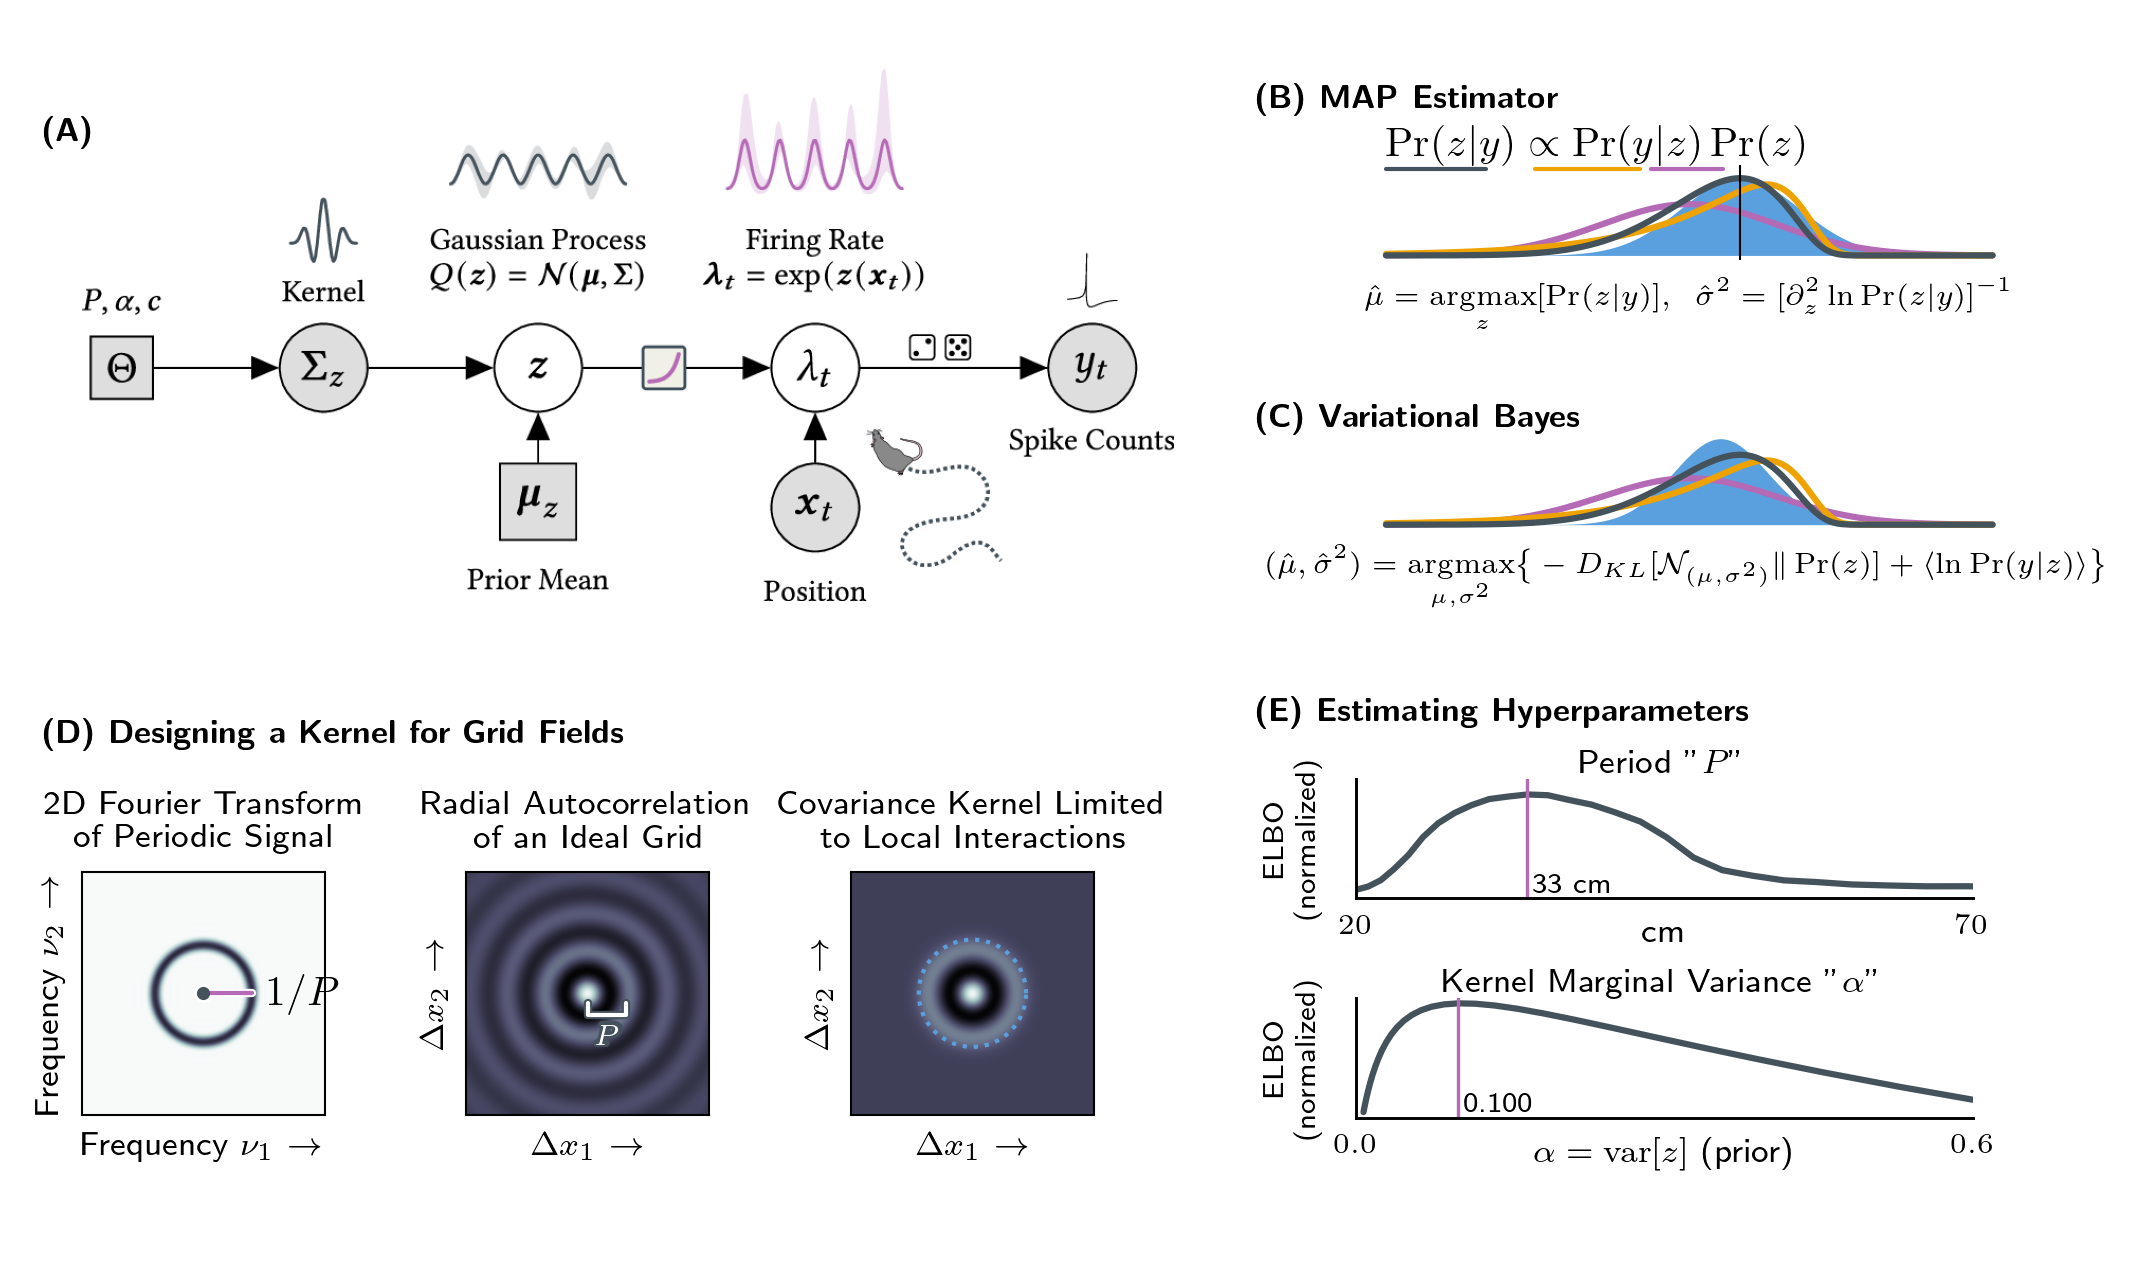

In [12]:
color_limits = [(0,66),(98,167),(174,222)]

figure(figsize=(6.919685,6.919685*(sqrt(5)-1)/2*.95),dpi=300)
subplots_adjust(0.025,0.025,.96,.95,6,15)
plotgrid = (8,10)

A1 = subplot2grid(plotgrid,(0,0),rowspan=4,colspan=6)
insertimage()

B1 = subplot2grid(plotgrid,(0,6),rowspan=2,colspan=4)
adjust_axis_height_pixels(75)
mapcartoon()
subfigurelabel(r'\textbf{(B) MAP Estimator}',fontsize=MEDIUM,dy=50,dx=100)
B3 = subplot2grid(plotgrid,(2,6),rowspan=2,colspan=4)
adjust_axis_height_pixels(75)
nudge_axis_y_pixels(50)
varcartoon()
subfigurelabel(r'\textbf{(C) Variational Bayes}',fontsize=MEDIUM,dy=0,dx=100)

nudgey = -100
nudgex = -40
C1 = subplot2grid(plotgrid,(4,0),rowspan=3,colspan=2)
nudge_axis_y_pixels(nudgey)
C2 = subplot2grid(plotgrid,(4,2),rowspan=3,colspan=2)
nudge_axis_y_pixels(nudgey)
nudge_axis_x(nudgex)
C3 = subplot2grid(plotgrid,(4,4),rowspan=3,colspan=2)
nudge_axis_y_pixels(nudgey)
nudge_axis_x(nudgex*2)
kernelplot(C1,C2,C3)
sca(C1)
subfigurelabel(r'\textbf{(D) Designing a Kernel for Grid Fields}',fontsize=MEDIUM,dy=165)

nudgey = 50
E1 = subplot2grid(plotgrid,(4,6),rowspan=2,colspan=4)
adjust_axis_height_pixels(50)
nudge_axis_y_pixels(-50+nudgey)
nudge_axis_right(50)
E2 = subplot2grid(plotgrid,(6,6),rowspan=2,colspan=4)
adjust_axis_height_pixels(50)
nudge_axis_y_pixels(50+nudgey)
nudge_axis_right(50)

optimplots(E1,E2)
sca(E1)
subfigurelabel(r'\textbf{(E) Estimating Hyperparameters}',fontsize=MEDIUM,
               dy=50,dx=100)

figurebox(color='w')
savefig('fig2.pdf', dpi=800)
savefig('fig2.svg', dpi=800)